Portfolio Optimization Model. Import necessary libraries

In [1]:
# %pip install yfinance
# %pip install riskfolio-lib
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Dataframes

In [3]:
start_date = '2023-10-30'
end_date = '2024-09-30'

asset_classes = pd.read_csv("asset_bateleur30.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

data = yf.download(assets, start=start_date, end=end_date)["Adj Close"]

# currency_data = yf.download()

[*********************100%***********************]  30 of 30 completed

1 Failed download:
['AECI.JO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [4]:
data.head()

# asset_classes = {'Assets': ["PRX.JO", "NPN.JO", "FSR.JO", "BVT.JO", "AMS.JO", "CPI.JO", "SBK.JO","GFI.JO","SHP.JO","BTI.JO","IBIT"],
#                  'Class 1': ['Equity', 'Equity', 'Equity', 'Equity', 'Equity',
#                              'Equity', 'Equity', 'Equity', 'Equity','Equity', 'Crypto']}

# asset_classes = pd.DataFrame(asset_classes)

# asset_classes = asset_classes.sort_values(by=['Assets'])

# constraints = {'Disabled': [False, False, False, False, False, False, False, False, False, False, False],
#                'Type': ['Classes', 'Classes', 'Assets', 'Assets', 'Classes',
#                         'All Assets', 'Each asset in a class'],
#                'Set': ['Class 1', 'Class 1', '', '', 'Class 2', '', 'Class 1'],
#                'Position': ['Equity', 'Fixed Income', 'BAC', 'WFC', 'Financial',
#                             '', 'Equity'],
#                'Sign': ['<=', '<=', '<=', '<=', '>=', '>=', '>='],
#                'Weight': [0.6, 0.5, 0.1, '', '', 0.02, ''],
#                'Type Relative': ['', '', '', 'Assets', 'Classes', '', 'Assets'],
#                'Relative Set': ['', '', '', '', 'Class 1', '', ''],
#                'Relative': ['', '', '', 'FB', 'Fixed Income', '', 'TLT'],
#                'Factor': ['', '', '', 1.2, 0.5, '', 0.4]}

# constraints = pd.DataFrame(constraints)

# constraints = {'Disabled': [False, False, False, False, False, False, False, False, False, False, False],
#                'Type': ['Classes', 'Classes', 'Assets', 'Assets', 'Classes',
#                         'All Assets', 'Each asset in a class'],
#                'Set': ['Class 1', 'Class 1', '', '', 'Class 2', '', 'Class 1'],
#                'Position': ['Equity', 'Fixed Income', 'BAC', 'WFC', 'Financial',
#                             '', 'Equity'],
#                'Sign': ['<=', '<=', '<=', '<=', '>=', '>=', '>='],
#                'Weight': [0.6, 0.5, 0.1, '', '', 0.02, ''],
#                'Type Relative': ['', '', '', 'Assets', 'Classes', '', 'Assets'],
#                'Relative Set': ['', '', '', '', 'Class 1', '', ''],
#                'Relative': ['', '', '', 'FB', 'Fixed Income', '', 'TLT'],
#                'Factor': ['', '', '', 1.2, 0.5, '', 0.4]}

# constraints = pd.read_csv("viewsExelXGlobal5.3.csv")
# constraints

# constraints = pd.DataFrame(constraints)

Ticker,AECI.JO,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,NTC.JO,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TRU.JO
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-30 00:00:00+00:00,NaN,5127.791016,101388.000000,14018.697266,6548.250488,52622.234375,39502.472656,51773.285156,25340.931641,218796.828125,...,1190.548584,6064.439941,52825.937500,13942.450195,37625.332031,17064.097656,23562.931641,23805.460938,3592.645752,6884.520996
2023-10-31 00:00:00+00:00,NaN,5173.660156,105972.695312,14131.877930,6560.502441,51619.695312,38586.101562,51795.550781,25483.898438,221479.828125,...,1229.598511,5841.268555,52515.019531,13975.429688,38698.570312,17009.224609,23285.068359,23282.015625,3431.589844,7105.691406
2023-11-01 00:00:00+00:00,NaN,5303.623047,104920.453125,14170.524414,6709.412109,51941.554688,39133.582031,52119.296875,25705.111328,218246.453125,...,1235.313232,5841.268555,52460.035156,13792.103516,39144.253906,16960.863281,23358.191406,23183.437500,3454.467285,7152.748535
2023-11-02 00:00:00+00:00,NaN,5327.513184,106887.039062,14400.565430,6802.715820,52910.062500,39631.289062,52158.253906,26569.677734,225135.734375,...,1247.694946,5940.240234,53451.902344,13915.291992,40584.234375,17723.484375,24617.843750,23019.798828,3431.589844,7515.092285
2023-11-03 00:00:00+00:00,NaN,5303.623047,108061.195312,14779.672852,6828.163086,52499.714844,39611.773438,52685.152344,26837.257812,227445.140625,...,1251.504761,5747.148438,55844.585938,14104.437500,41170.820312,18043.412109,24598.343750,22869.960938,3431.589844,7702.381348


In [14]:
returns = data.pct_change().dropna()
returns.head()

Ticker,ABG.JO,AEG.JO,AMS.JO,ANG.JO,APN.JO,ARI.JO,ARL.JO,ASC.JO,BAT.JO,BTI.JO,...,REN.JO,SAP.JO,SOL.JO,SPG.JO,SPP.JO,SSW.JO,SUR.JO,TFG.JO,TKG.JO,TRU.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-27 00:00:00+00:00,-0.013356,0.008475,0.000571,0.018247,0.003800,0.004956,-0.014281,-0.037037,-0.033613,-0.008768,...,0.000000,-0.018392,-0.012167,0.002143,-0.008555,0.013025,0.000000,-0.008317,-0.027305,-0.015279
2024-05-28 00:00:00+00:00,-0.000915,-0.005042,-0.072604,-0.006630,0.023638,-0.008090,-0.012768,0.000000,-0.008696,0.001202,...,0.000000,0.003212,-0.034411,-0.015324,0.025491,-0.009954,-0.000333,0.009362,-0.018308,0.013654
2024-05-30 00:00:00+00:00,-0.035149,-0.003378,-0.050255,0.011366,-0.001290,-0.012431,0.010454,0.012821,0.008772,0.013979,...,-0.018357,-0.021345,-0.015387,-0.018458,-0.017990,-0.002514,-0.003001,-0.069469,-0.028595,-0.060005
2024-05-31 00:00:00+00:00,0.011940,0.000000,-0.034749,-0.025612,0.000474,-0.002562,-0.073413,0.000000,0.000000,0.023348,...,0.018701,-0.026899,0.004858,-0.000369,0.024131,-0.008400,-0.001672,-0.013602,0.012799,-0.006253
2024-06-03 00:00:00+00:00,0.038748,0.028814,-0.009680,0.001117,0.003228,-0.001727,0.071858,0.000000,-0.173913,-0.006045,...,-0.000966,-0.003175,-0.065270,0.021763,0.003655,-0.016942,0.001675,0.008421,-0.005897,0.034740


In [15]:
# Building the portfolio object
port = rp.HCPortfolio(returns=returns)

# Estimate optimal portfolio:

codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w1 = port.optimization(model='HERC',
                       codependence=codependence,
                       method_cov='hist',
                       rm=rm,
                       rf=rf,
                       linkage=linkage,
                       max_k=max_k,
                       leaf_order=leaf_order)

w2 = port.optimization(model='HERC2',
                       codependence=codependence,
                       method_cov='hist',
                       rm=rm,
                       rf=rf,
                       linkage=linkage,
                       max_k=max_k,
                       leaf_order=leaf_order)

w = pd.concat([w1, w2], axis=1)
w.columns = ['HERC', 'HERC2']

display(w.sort_values(by='HERC', ascending=False).style.format("{:.2%}").background_gradient(cmap='YlGn'))

,HERC,HERC2
BTI.JO,11.38%,4.36%
PRX.JO,6.68%,4.36%
NPN.JO,5.34%,4.36%
CML.JO,4.91%,1.71%
MRF.JO,4.43%,4.36%
GRT.JO,3.98%,1.71%
MNP.JO,3.78%,1.39%
EOH.JO,3.53%,4.36%
SUR.JO,2.98%,4.36%
EXX.JO,2.92%,1.39%


<Axes: title={'center': 'Risk (Standard Deviation) Contribution per Asset'}>

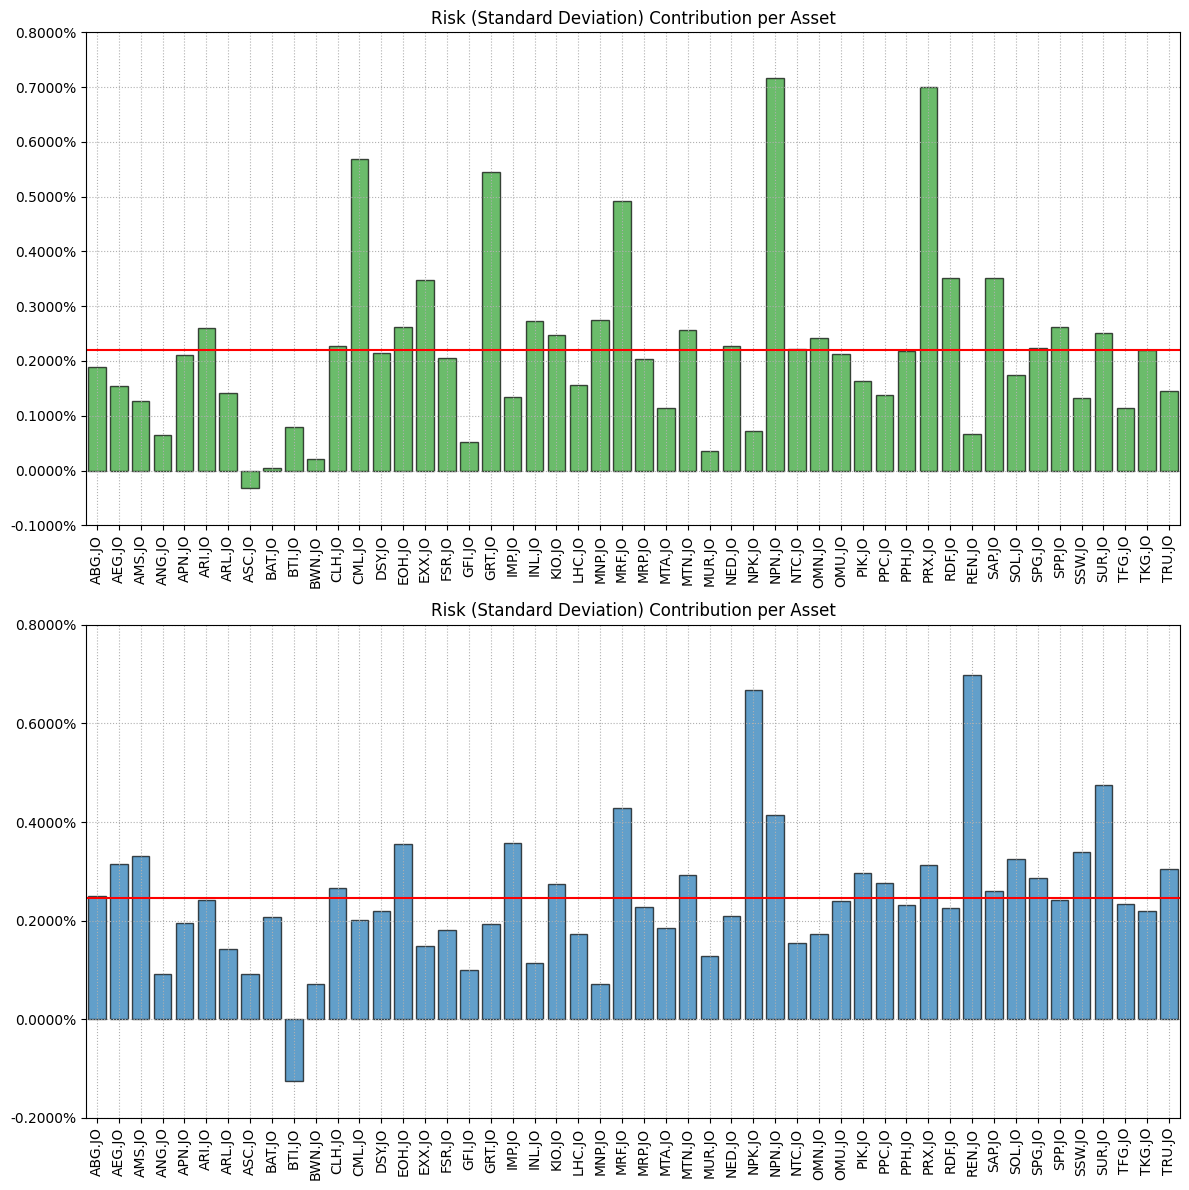

In [16]:
import matplotlib.pyplot as plt

# Plotting the risk contribution per asset

mu = returns.mean()
cov = returns.cov() # Covariance matrix
returns = returns # Returns of the assets

fig, ax = plt.subplots(2,1, figsize=(12, 12))

ax = np.ravel(ax)
rp.plot_risk_con(w=w1,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 rf=0,
                 alpha=0.05,
                 color="tab:green",
                 height=6,
                 width=10,
                 t_factor=252,
                 ax=ax[0])

rp.plot_risk_con(w=w2,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 rf=0,
                 alpha=0.05,
                 color="tab:blue",
                 height=6,
                 width=10,
                 t_factor=252,
                 ax=ax[1])

AttributeError: module 'cvxpy' has no attribute 'constraints'

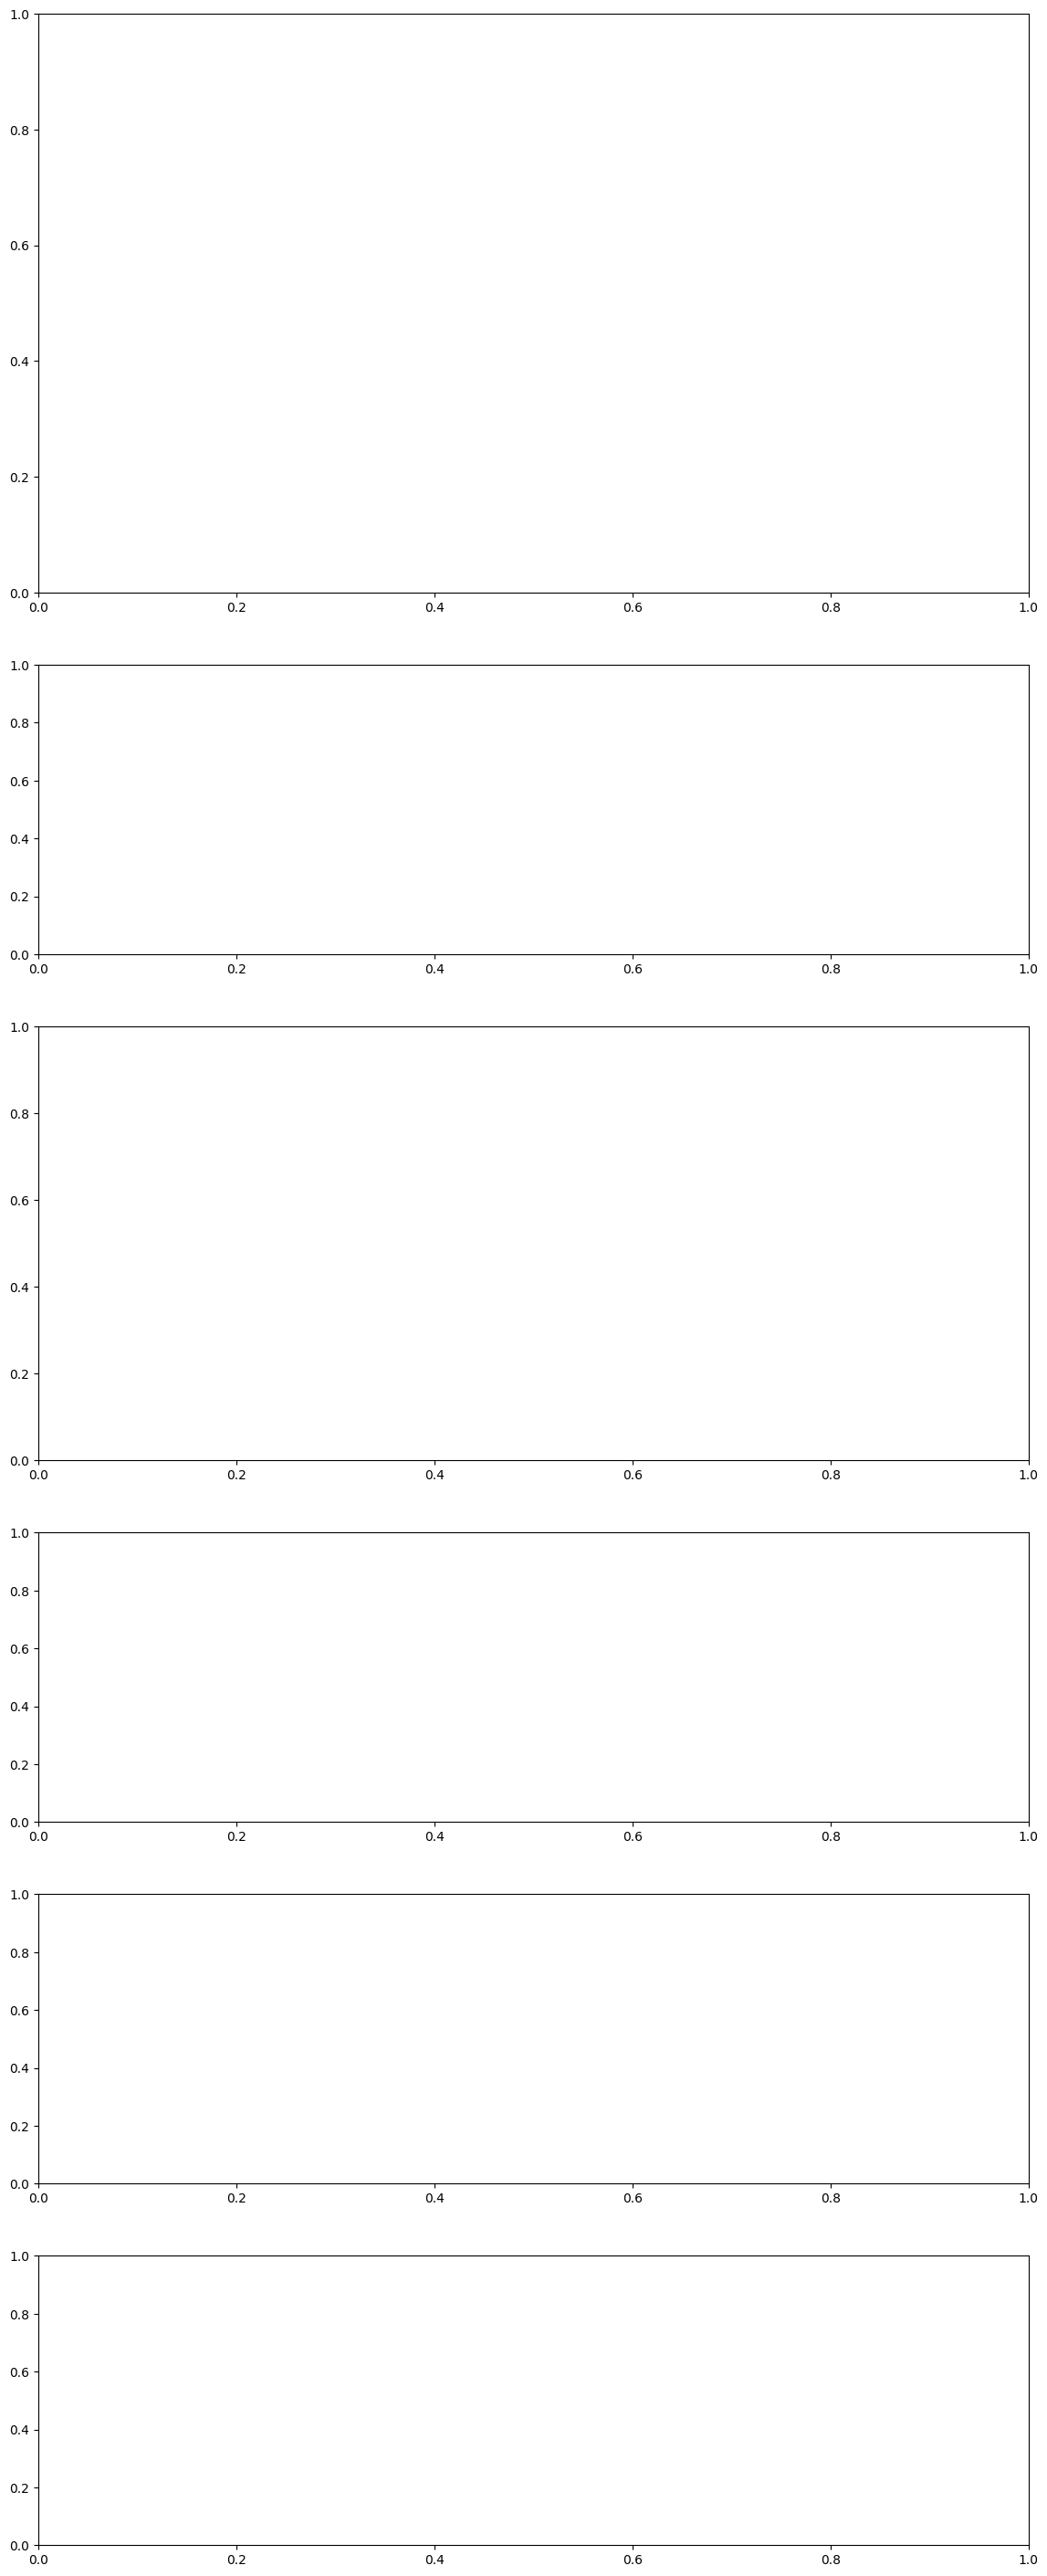

In [17]:
ax = rp.jupyter_report(returns, w1, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

In [11]:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
model = "Classic"
hist = True
rm = "MV"
obj = "MinRisk"
rf = 0
l = 0


"""
The risk measure used to optimize the portfolio. The default is ‘MV’. Possible values are:

’MV’: Standard Deviation.
’KT’: Square Root of Kurtosis.
’MAD’: Mean Absolute Deviation.
’GMD’: Gini Mean Difference.
’MSV’: Semi Standard Deviation.
’SKT’: Square Root of Semi Kurtosis.
’FLPM’: First Lower Partial Moment (Omega Ratio).
’SLPM’: Second Lower Partial Moment (Sortino Ratio).
’CVaR’: Conditional Value at Risk.
’TG’: Tail Gini.
’EVaR’: Entropic Value at Risk.
’RLVaR’: Relativistic Value at Risk.
’WR’: Worst Realization (Minimax).
’RG’: Range of returns.
’CVRG’: CVaR range of returns.
’TGRG’: Tail Gini range of returns.
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
’ADD’: Average Drawdown of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.
’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative returns.
’UCI’: Ulcer Index of uncompounded cumulative returns.
"""

'\nThe risk measure used to optimize the portfolio. The default is ‘MV’. Possible values are:\n\n’MV’: Standard Deviation.\n’KT’: Square Root of Kurtosis.\n’MAD’: Mean Absolute Deviation.\n’GMD’: Gini Mean Difference.\n’MSV’: Semi Standard Deviation.\n’SKT’: Square Root of Semi Kurtosis.\n’FLPM’: First Lower Partial Moment (Omega Ratio).\n’SLPM’: Second Lower Partial Moment (Sortino Ratio).\n’CVaR’: Conditional Value at Risk.\n’TG’: Tail Gini.\n’EVaR’: Entropic Value at Risk.\n’RLVaR’: Relativistic Value at Risk.\n’WR’: Worst Realization (Minimax).\n’RG’: Range of returns.\n’CVRG’: CVaR range of returns.\n’TGRG’: Tail Gini range of returns.\n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).\n’ADD’: Average Drawdown of uncompounded cumulative returns.\n’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.\n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.\n’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative re

Optimize

In [18]:
A , B = rp.assets_constraints(constraints, asset_classes)

# print(A)
# print(B)

port = rp.Portfolio(returns = returns, ainequality = A, binequality = B)

# # # # port.uppermdd = 0.15
# # # # port.lowerret = 0.15/365
port.assets_stats(method_mu=method_mu, method_cov=method_cov)
w = port.optimization(model=model, rm=rm, rf=rf, obj=obj, l=l, hist=hist)
port
print(w)

AttributeError: module 'cvxpy' has no attribute 'constraints'

**Plotting**

In [ ]:
# ax = rp.plot_pie(w=w1, title="HERC Optimum Portfolio", others = 0.05, cmap = "tab20")
# plt.show()

input()

9

**Plot the efficient frontier**

In [23]:
frontier = port.efficient_frontier(model=model, rm=rm, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns = returns, rm=rm, rf=rf, cmap = "viridis", w=w)
plt.show()

AttributeError: module 'cvxpy' has no attribute 'constraints'

In [ ]:
frontier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ABG.JO,1.127643e-09,5.267225e-11,2.789402e-11,1.057238e-10,4.126116e-11,1.246611e-11,6.630559e-11,4.098384e-11,2.177684e-10,6.961977e-12,8.940633e-11,8.199429e-11,1.075758e-10,1.238247e-11,9.418880e-11,2.754443e-12,3.139738e-12,5.648189e-12,2.530783e-12,1.046712e-11
AEG.JO,6.325080e-09,4.653868e-02,8.557254e-02,1.216007e-01,1.625512e-01,2.194613e-01,2.655989e-01,3.070023e-01,3.435119e-01,3.864917e-01,4.336275e-01,4.696338e-01,3.818533e-01,3.051283e-01,2.426190e-01,1.873797e-01,1.366512e-01,8.901782e-02,4.364608e-02,3.848213e-10
AMS.JO,6.636529e-03,7.328349e-11,2.003256e-11,6.532410e-11,2.220978e-11,6.016537e-12,3.120645e-11,1.871854e-11,9.998049e-11,3.264136e-12,4.279420e-11,3.935688e-11,5.399449e-11,6.386975e-12,5.061633e-11,1.429897e-12,1.620319e-12,2.929499e-12,1.362690e-12,6.763292e-12
ANG.JO,2.000000e-02,2.000000e-02,1.359673e-02,4.148985e-10,7.604342e-11,1.424110e-11,6.734491e-11,3.730461e-11,1.819742e-10,5.445341e-12,6.548841e-11,5.817273e-11,7.539991e-11,8.705396e-12,6.869025e-11,1.965656e-12,2.200950e-12,3.996015e-12,1.843626e-12,8.944530e-12
APN.JO,1.240672e-08,9.482432e-11,3.365991e-11,1.169389e-10,4.230093e-11,1.137581e-11,5.887010e-11,3.521643e-11,1.906980e-10,6.258378e-12,8.240819e-11,7.568557e-11,1.064084e-10,1.267023e-11,9.866228e-11,2.784439e-12,3.235082e-12,5.764390e-12,2.650373e-12,1.244042e-11
ARI.JO,1.628957e-09,5.485985e-11,2.576875e-11,9.010264e-11,3.393458e-11,9.590982e-12,5.015276e-11,3.029176e-11,1.654980e-10,5.439034e-12,7.185652e-11,6.603580e-11,9.316795e-11,1.111741e-11,8.685576e-11,2.442304e-12,2.841914e-12,5.057335e-12,2.334568e-12,1.121244e-11
ARL.JO,5.659333e-02,2.103896e-02,2.169859e-10,5.744047e-10,1.730887e-10,4.221963e-11,2.118132e-10,1.234800e-10,6.064946e-10,1.830526e-11,2.219981e-10,1.982523e-10,2.578644e-10,2.947560e-11,2.227937e-10,6.520001e-12,7.500200e-12,1.339617e-11,5.983039e-12,2.424343e-11
ASC.JO,7.591641e-02,4.322568e-02,7.280208e-10,4.780359e-10,1.124307e-10,1.926237e-11,9.194086e-11,5.094060e-11,2.551025e-10,7.927174e-12,9.876742e-11,8.869601e-11,1.198275e-10,1.396779e-11,1.078223e-10,3.075624e-12,3.567639e-12,6.343656e-12,2.892342e-12,1.329250e-11
BAT.JO,8.157176e-03,1.875376e-02,3.072131e-02,3.729880e-02,3.979214e-02,3.360502e-02,2.861004e-02,2.296359e-02,1.490040e-02,8.053137e-11,5.454179e-10,4.090545e-10,4.414610e-10,4.699989e-11,3.446733e-10,1.044920e-11,1.195248e-11,2.117620e-11,9.239948e-12,3.456691e-11
BTI.JO,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,9.296930e-10,2.539629e-11,1.051041e-10,5.357480e-11,2.460680e-10,7.078026e-12,8.258540e-11,7.265171e-11,9.258605e-11,1.064304e-11,8.414094e-11,2.410526e-12,2.677590e-12,4.887804e-12,2.248813e-12,1.065337e-11


Plot the data above

In [24]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap = "tab20")
plt.show()

NameError: name 'frontier' is not defined

Extract the weights

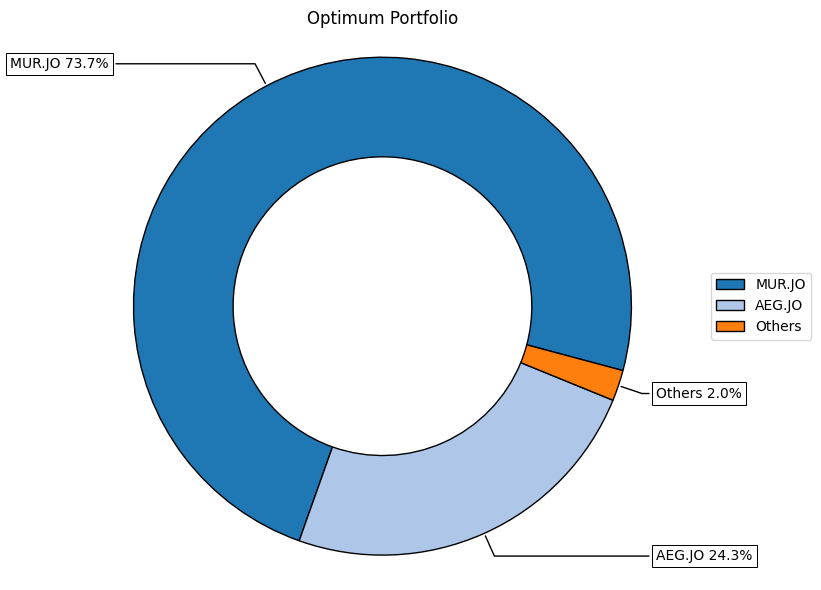

In [ ]:
ax = rp.plot_pie(w=pd.DataFrame(frontier[14]), title = "Optimum Portfolio", others = 0.05, cmap = "tab20")
plt.show()

Pull up the jupyter report

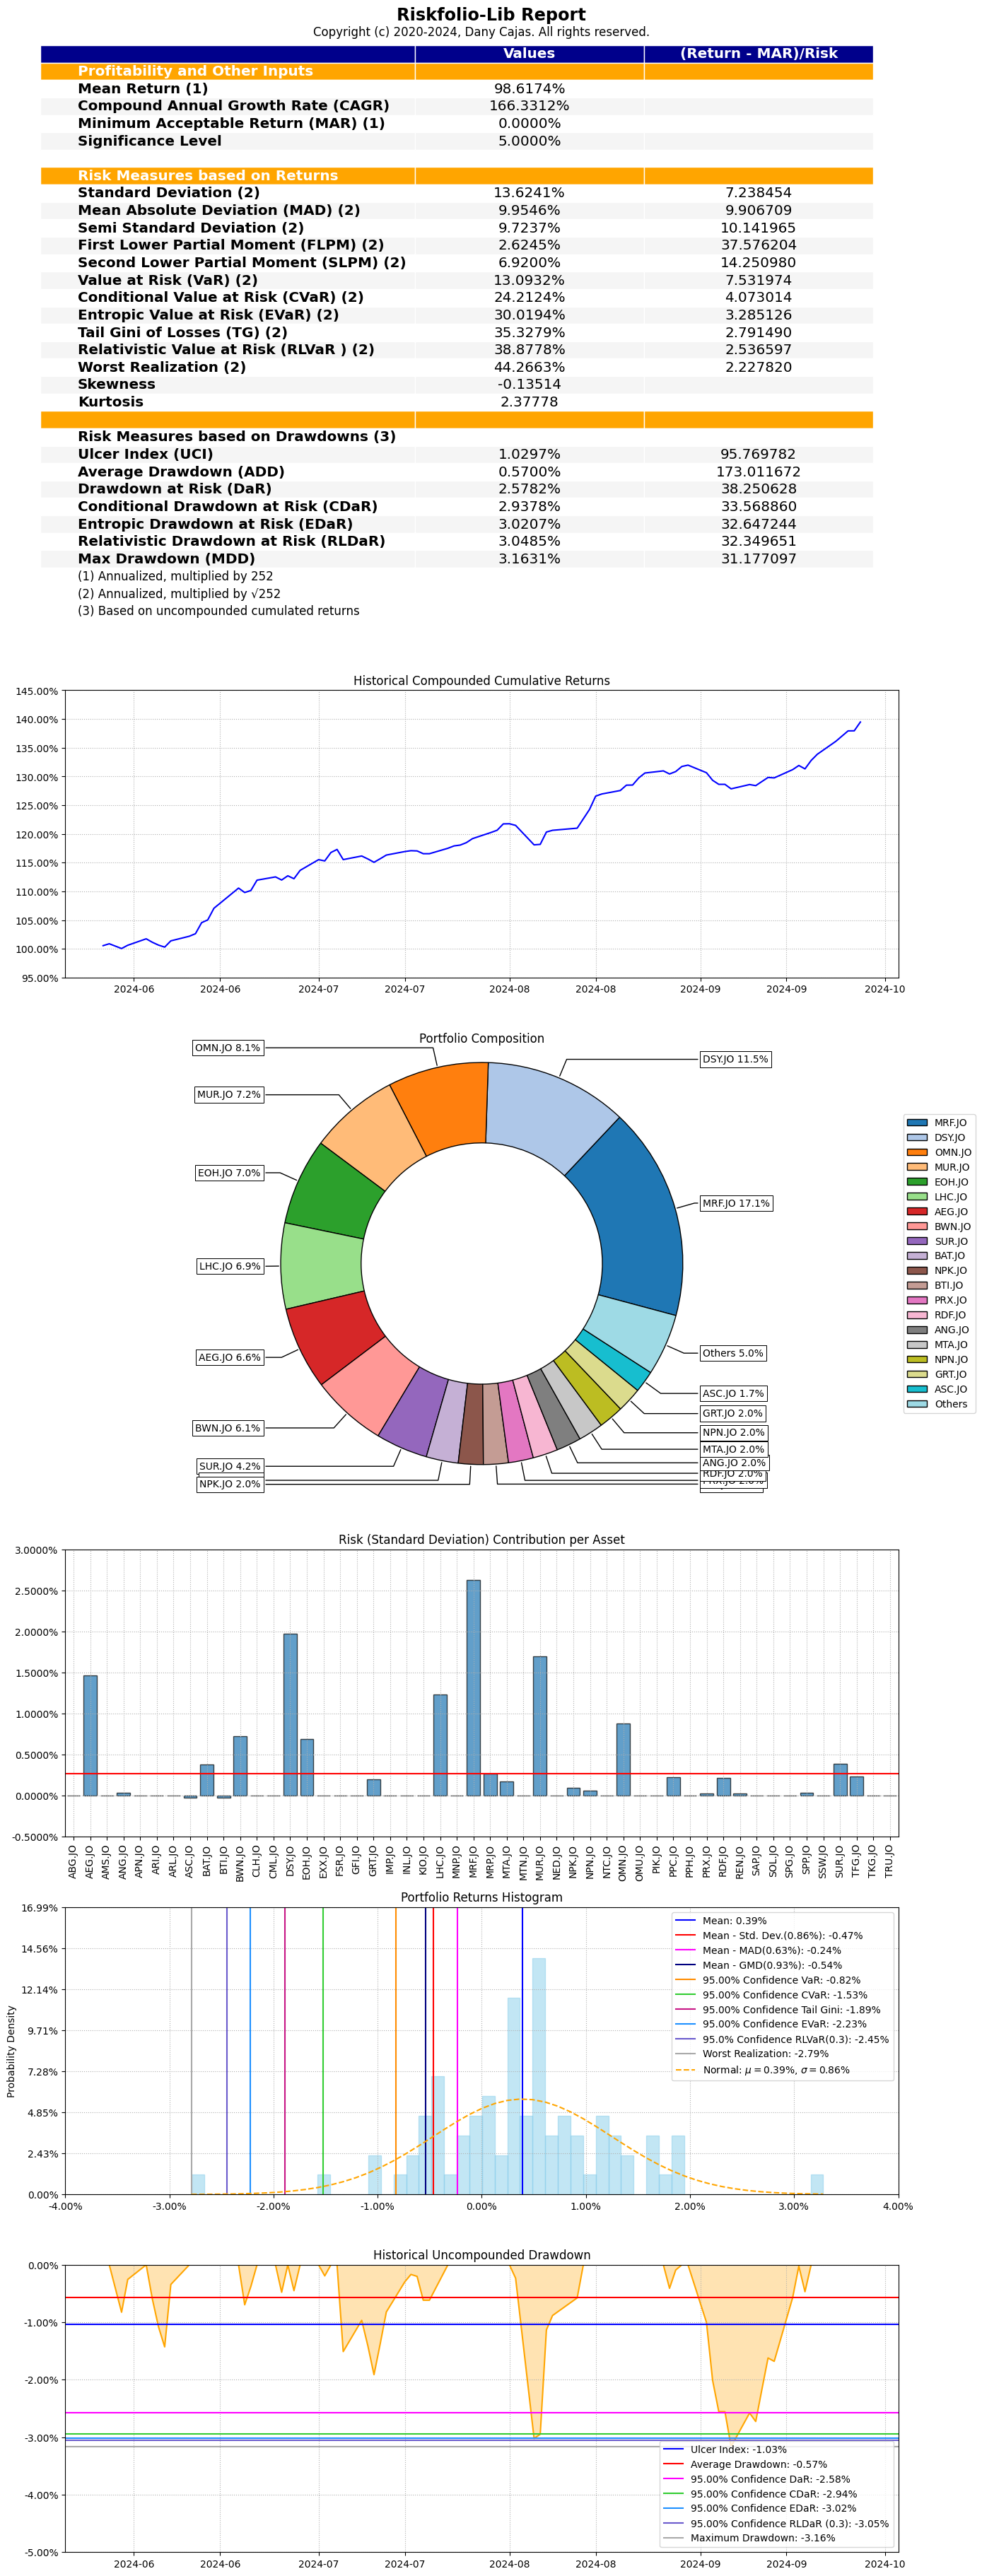

In [ ]:
ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

In [ ]:
# rp.excel_report(returns,
#                 w,
#                 rf=0,
#                 alpha=0.05,
#                 t_factor=252,
#                 ini_days=1,
#                 days_per_year=252,
#                 name="report")

# rp.excel_report(returns, w, rf = 0,alpha=0.05,ini_days=1)

Let's check the correlation between these companies

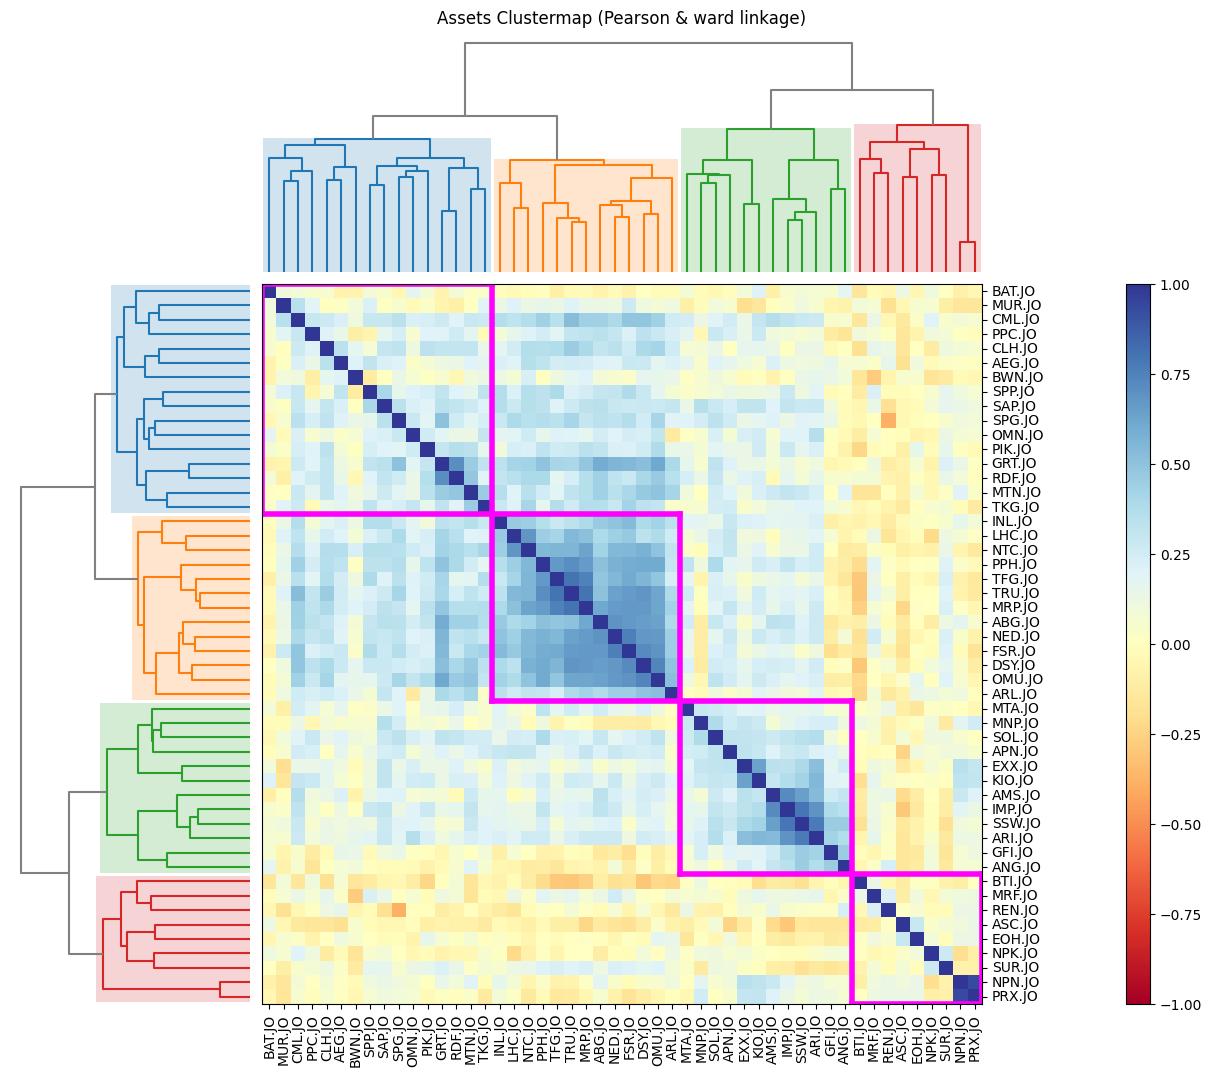

In [ ]:
ax = rp.plot_clusters(returns,
                      codependence = "pearson",
                      linkage = "ward",
                      k = None,
                      max_k = 10,
                      leaf_order = True,
                      dendrogram = True,
                      ax = None)

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ABG.JO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AEG.JO,6.65%,11.86%,5.58%,7.67%,3.74%,6.21%,0.00%,0.00%,0.00%,0.00%,2.10%,1.47%,0.00%
AMS.JO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ANG.JO,2.00%,1.12%,2.00%,1.72%,2.00%,2.00%,0.00%,0.00%,0.00%,2.00%,1.58%,2.00%,0.00%
APN.JO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARI.JO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARL.JO,0.00%,0.00%,2.85%,0.00%,7.88%,13.38%,20.54%,20.54%,0.00%,0.00%,0.00%,0.00%,0.00%
ASC.JO,1.75%,2.25%,1.56%,0.00%,3.12%,1.54%,8.59%,8.59%,11.56%,2.12%,7.85%,4.33%,10.49%
BAT.JO,2.58%,3.80%,0.00%,0.14%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BTI.JO,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%,2.00%
